In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## 1. Data Exploration and Preparation

In [3]:
df = pd.read_csv("watson_healthcare_modified.csv")
df

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


In [9]:
df_t = pd.read_csv("watson_shap_values_for_testset.csv")
df_t

,EmployeeID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,ShiftSchedule,State,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,10011,-0.082934,-0.049007,0.033110,-0.052101,-0.094783,-0.007782,-0.056123,0,-0.106410,...,0.109181,-0.195666,0.056648,0.011107,-0.017621,-0.000377,-0.032997,0.003732,-0.042552,-0.120689
1,10012,-0.061724,-0.185156,0.004095,-0.055188,-0.063846,-0.032673,-0.057622,0,-0.025947,...,-0.035909,-0.169545,0.043217,0.079458,-0.052512,-0.043295,0.060303,0.016709,-0.037952,0.152560
2,10013,0.006087,-0.057510,0.017782,-0.002091,-0.008152,-0.028928,-0.070993,0,-0.042936,...,-0.038788,-0.169869,0.099417,-0.009016,-0.046488,-0.080971,-0.022697,0.007191,-0.037359,-0.110958
3,10014,-0.012834,0.242323,-0.044950,-0.039829,-0.133996,-0.034905,-0.051805,0,-0.053241,...,-0.024949,0.165522,0.033103,-0.006922,-0.044399,-0.036111,-0.074827,-0.025470,0.004950,-0.036003
4,10015,-0.035391,-0.023601,0.014274,0.015462,-0.138073,0.007920,0.052945,0,-0.072430,...,-0.022945,0.126107,0.101879,-0.028295,-0.055819,-0.049084,-0.013705,0.011744,-0.039383,-0.054550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,10212,-0.039493,-0.034747,-0.044727,-0.022448,-0.117214,0.029679,-0.013860,0,-0.049312,...,-0.058096,-0.161909,-0.030475,-0.034089,-0.044657,-0.042839,-0.041159,-0.042855,-0.054734,-0.049729
202,10213,-0.091602,-0.053394,-0.107608,-0.053622,-0.109185,-0.012358,-0.083148,0,-0.023243,...,-0.028543,-0.160014,-0.005274,-0.015650,-0.028211,-0.015259,-0.041551,-0.032326,0.159189,-0.051259
203,10214,0.249557,-0.104146,0.015778,-0.091577,0.014157,0.022667,-0.102058,0,0.301851,...,-0.012861,0.224978,-0.058046,0.083066,0.003723,0.042219,0.120966,0.033763,-0.022962,0.393495
204,10215,-0.015204,-0.034563,-0.025504,-0.055249,-0.047021,0.015875,-0.072875,0,-0.042504,...,-0.041672,0.102638,0.077688,-0.035025,-0.009765,-0.055626,-0.028669,-0.031676,0.194487,-0.073237


We have two sets of data given, as shown above. 

**watson_healthcare_modified.csv**:<br>
This dataset contains raw data, Column names include EmployeeID, Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, etc. EmployeeCount, etc. The Attrition column indicates whether the employee is leaving (Yes/No).

**watson_shap_values_for_testset.csv**:<br>
The data in this dataset has been numerically transformed, possibly to explain the Shapley Additive Explanations (SHAPs) predicted by the model. SHAP values are used to explain the contribution of features in the machine learning model to the predicted results.

**Check our understanding of the relationship is correct**:

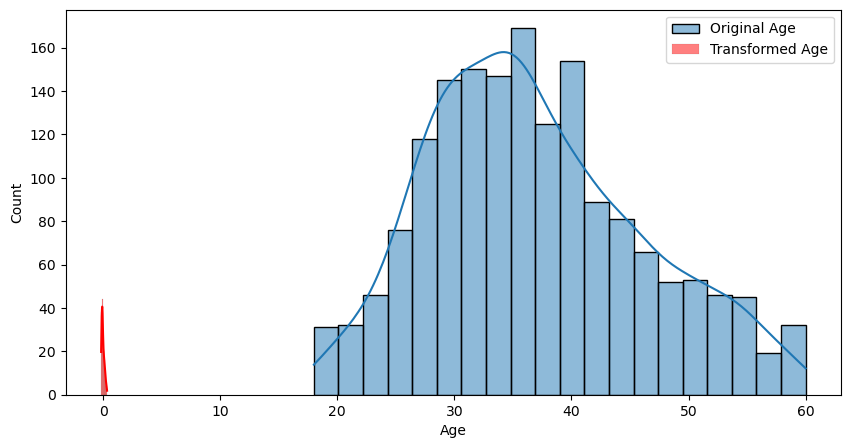

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Age"], kde=True, label="Original Age")
sns.histplot(df_t["Age"], kde=True, label="Transformed Age", color="red")
plt.legend()
plt.show()

### Examing and Preprocessing data
#### a) Unique values for each column

In [23]:
df.nunique()

EmployeeID                  1676
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        5
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
Shift                          4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

We figure out 
- EmployeeCount is always 1
- StandardHours is always 80
- Over18 is always Yes <br>

So we consider that they are not informative enough to be in the model, and we drop them.

In [24]:
df.drop(['Over18','StandardHours', 'EmployeeCount'], axis = 1, inplace = True)
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,2,...,3,1,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,3,...,4,4,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,4,...,3,2,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,4,...,3,3,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,3,4,1,6,3,3,2,2,2,2


#### b) Missing Values

In [25]:
missing_values = df.isnull().sum()
missing_values

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

## 2. EDA

Note that we are using the original data (**df**, watson_healthcare_modified.csv) for EDA.

In our EDA, we include

a) Attrition Distribution<br>
b) Demographic Factors vs. Attrition<br>
c) Job-Related Factors vs. Attrition<br>
d) Satisfaction & Work-Life Balance vs. Attrition<br>
e) Compensation & Financial Factors vs. Attrition

### a) Attrition distribution

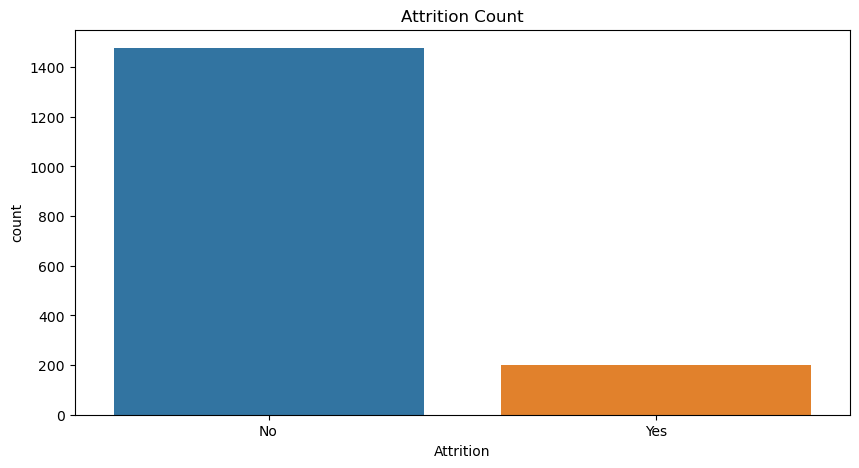

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x="Attrition", data=df)
plt.title("Attrition Count")
plt.show()

### b) Demographic Factors vs. Attrition

**Analyzing the impact of age, education level, gender, and marital status on employee attrition.**

Text(0.5, 1.0, 'Marital Status vs Attrition')

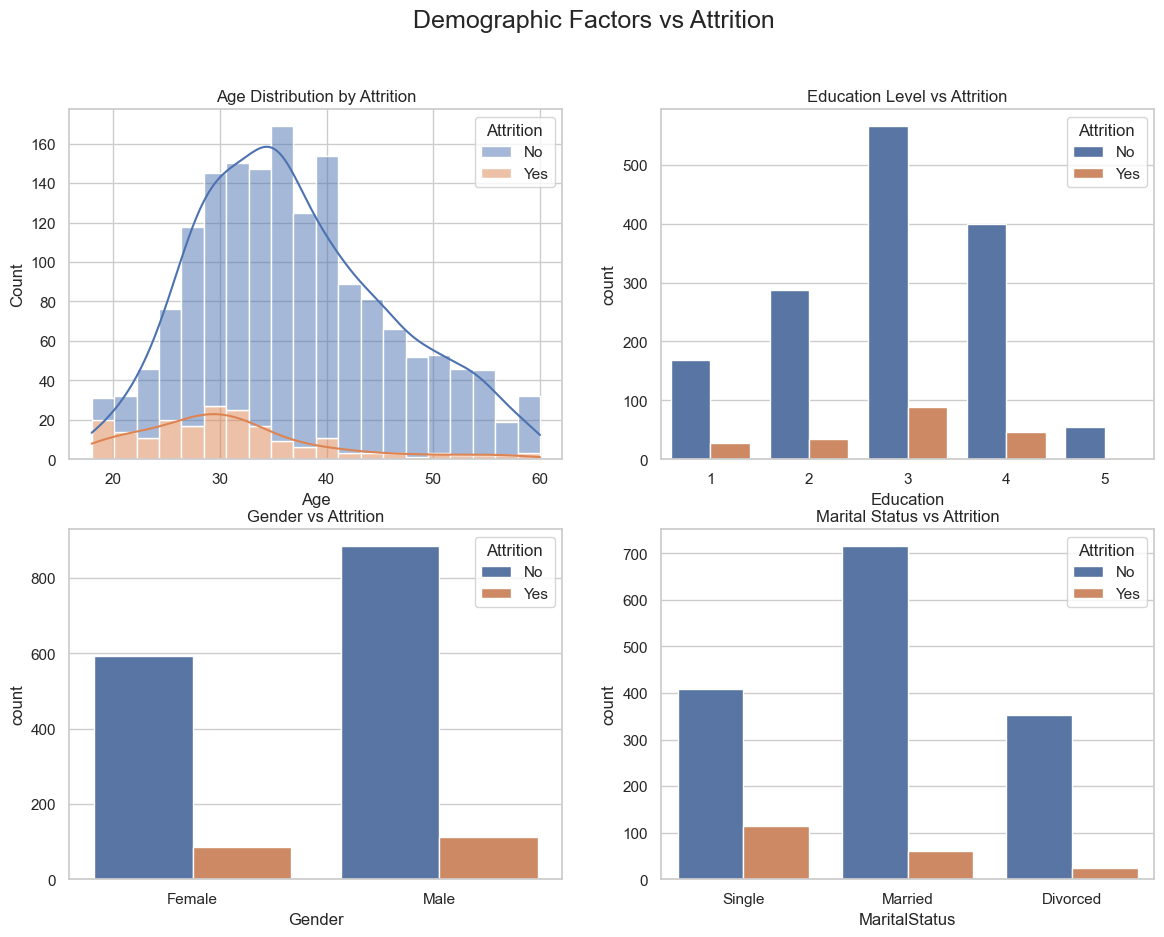

In [32]:
fig_demographic, dem_axes = plt.subplots(2, 2, figsize=(14, 10))
fig_demographic.suptitle("Demographic Factors vs Attrition", fontsize=18)

sns.histplot(df, x="Age", hue="Attrition", multiple="stack", kde=True, ax=dem_axes[0, 0])
dem_axes[0, 0].set_title("Age Distribution by Attrition")

sns.countplot(x="Education", hue="Attrition", data=df, ax=dem_axes[0, 1])
dem_axes[0, 1].set_title("Education Level vs Attrition")

sns.countplot(x="Gender", hue="Attrition", data=df, ax=dem_axes[1, 0])
dem_axes[1, 0].set_title("Gender vs Attrition")

sns.countplot(x="MaritalStatus", hue="Attrition", data=df, ax=dem_axes[1, 1])
dem_axes[1, 1].set_title("Marital Status vs Attrition")

**Takeaways:**

- Age: Younger employees tend to have a higher attrition rate, particularly those under 35.
- Education Level: No clear trend between education level and attrition, suggesting that education may not be a strong predictor.
- Gender: Both male and female employees show similar attrition rates, indicating gender is not a significant factor.
- Marital Status: Single employees exhibit a higher attrition rate compared to married or divorced employees.

### 2. Job-Related Factors vs. Attrition

**Examining the relationship between department, business travel frequency, and attrition rates.**

Text(0.5, 1.0, 'Business Travel vs Attrition')

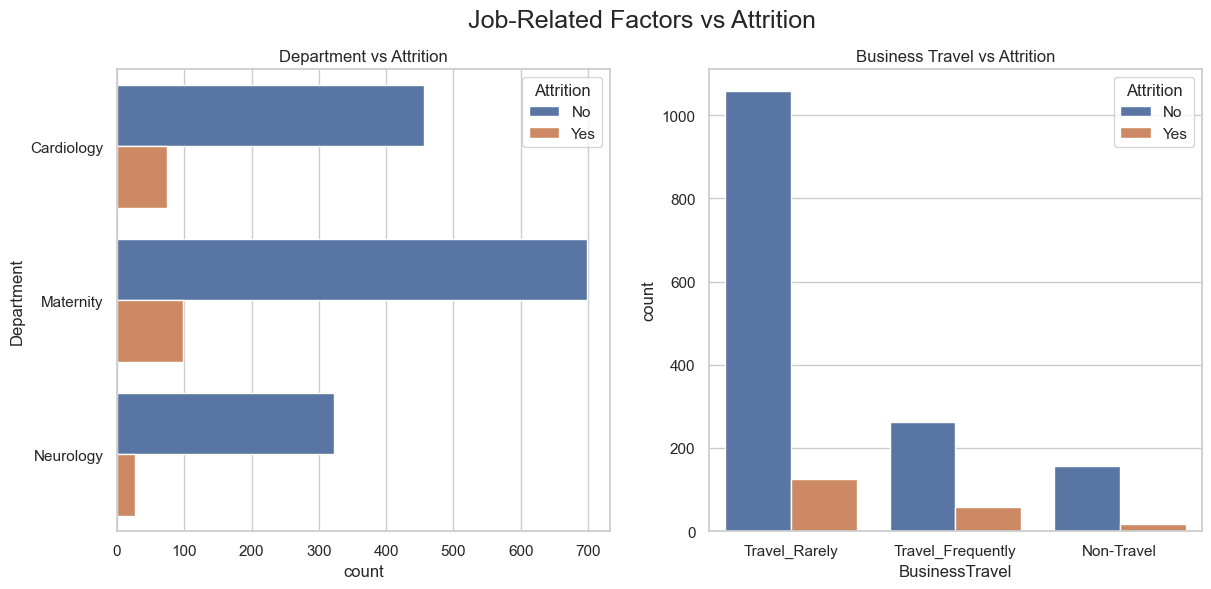

In [33]:
fig_job, job_axes = plt.subplots(1, 2, figsize=(14, 6))
fig_job.suptitle("Job-Related Factors vs Attrition", fontsize=18)

sns.countplot(y="Department", hue="Attrition", data=df, ax=job_axes[0])
job_axes[0].set_title("Department vs Attrition")

sns.countplot(x="BusinessTravel", hue="Attrition", data=df, ax=job_axes[1])
job_axes[1].set_title("Business Travel vs Attrition")

**Takeaways:**

- Department: Some departments, such as Cardiology and Maternity, have higher attrition rates, potentially due to work conditions or job demands.
- Business Travel: Employees who travel frequently for work tend to have slightly higher attrition, indicating travel-related stress might contribute to turnover.

### 3. Satisfaction & Work-Life Balance vs. Attrition

**Investigating how job satisfaction and work-life balance influence employee attrition.**

Text(0.5, 1.0, 'Work-Life Balance Distribution by Attrition')

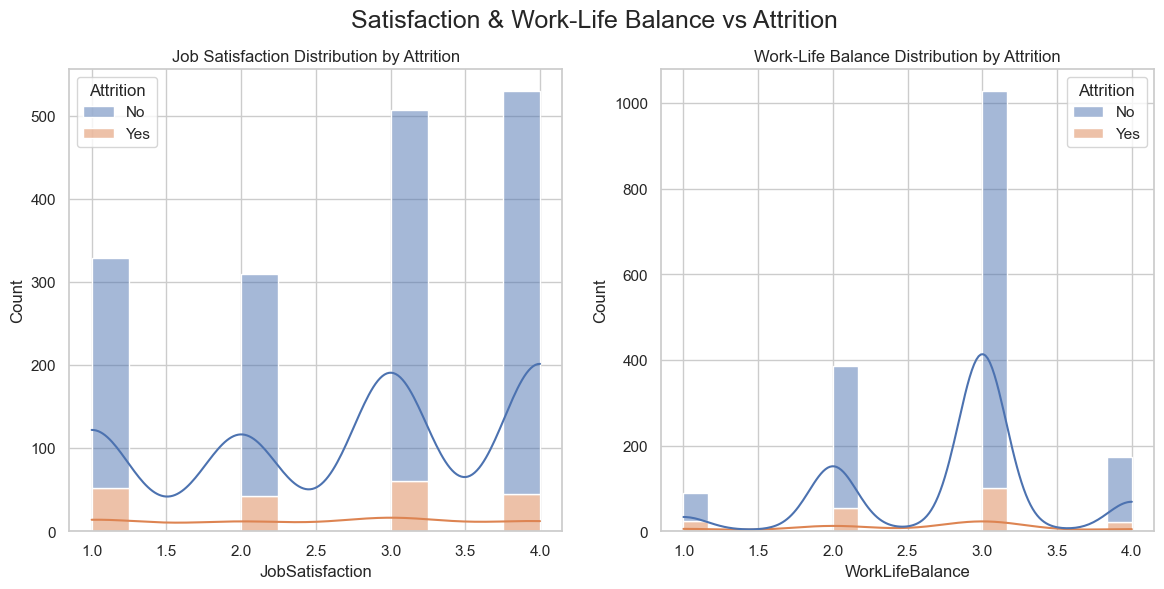

In [34]:
fig_satisfaction, sat_axes = plt.subplots(1, 2, figsize=(14, 6))
fig_satisfaction.suptitle("Satisfaction & Work-Life Balance vs Attrition", fontsize=18)

sns.histplot(df, x="JobSatisfaction", hue="Attrition", multiple="stack", kde=True, ax=sat_axes[0])
sat_axes[0].set_title("Job Satisfaction Distribution by Attrition")

sns.histplot(df, x="WorkLifeBalance", hue="Attrition", multiple="stack", kde=True, ax=sat_axes[1])
sat_axes[1].set_title("Work-Life Balance Distribution by Attrition")


**Takeaways**:

- Job Satisfaction: Employees with lower job satisfaction scores are more likely to leave, confirming its strong correlation with attrition.
- Work-Life Balance: Employees who report poor work-life balance have higher attrition rates, highlighting its importance in retention.

### 4. Compensation & Financial Factors vs. Attrition

**Exploring the effects of salary, salary hikes, hourly rate, and daily rate on employee attrition.**

Text(0.5, 1.0, 'Daily Rate vs Attrition')

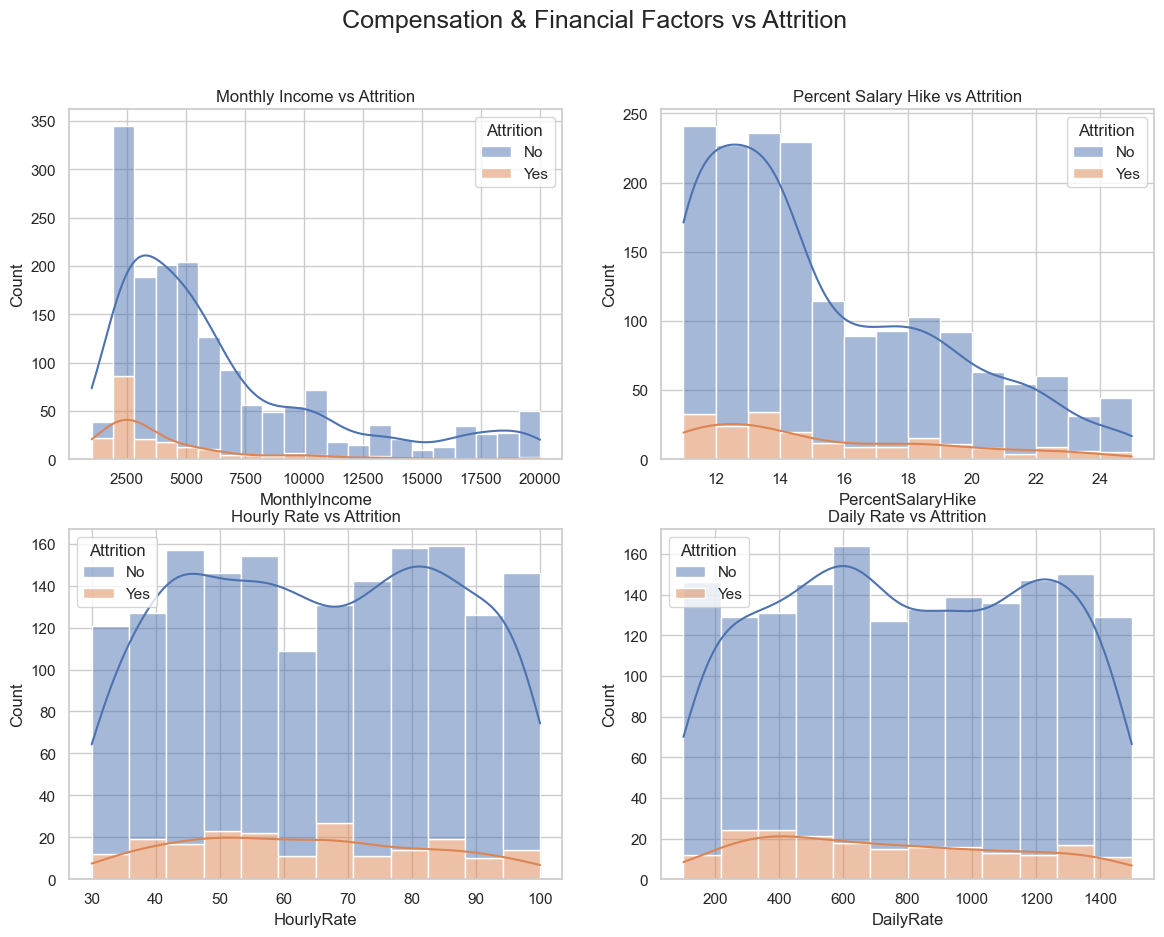

In [36]:
fig_salary, sal_axes = plt.subplots(2, 2, figsize=(14, 10))
fig_salary.suptitle("Compensation & Financial Factors vs Attrition", fontsize=18)

sns.histplot(df, x="MonthlyIncome", hue="Attrition", multiple="stack", kde=True, ax=sal_axes[0, 0])
sal_axes[0, 0].set_title("Monthly Income vs Attrition")

sns.histplot(df, x="PercentSalaryHike", hue="Attrition", multiple="stack", kde=True, ax=sal_axes[0, 1])
sal_axes[0, 1].set_title("Percent Salary Hike vs Attrition")

sns.histplot(df, x="HourlyRate", hue="Attrition", multiple="stack", kde=True, ax=sal_axes[1, 0])
sal_axes[1, 0].set_title("Hourly Rate vs Attrition")

sns.histplot(df, x="DailyRate", hue="Attrition", multiple="stack", kde=True, ax=sal_axes[1, 1])
sal_axes[1, 1].set_title("Daily Rate vs Attrition")

**Takeaways**:

- Monthly Income: Lower-income employees tend to leave more frequently, suggesting salary plays a role in retention.
- Salary Hike %: Employees with smaller salary increases over time show slightly higher attrition, indicating financial incentives impact retention.
- Hourly & Daily Rates: No clear trend observed, implying that absolute salary figures might be more relevant than per-hour or per-day earnings.

## 2.Model

We will focus on the strongest predictive factors based on the results generated from EDA:

- Strongly relevant: Age, Marital Status, Department, Overtime, Job Satisfaction, and Work-Life Balance
- Moderately relevant: Monthly Income, Salary Increase
- Weakly relevant: Gender, Education Level, Hourly Rate, and Daily Rate

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from scipy.stats import f_oneway
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Preprocessing

In [4]:
# Drop irrelevant columns
df = df.drop(["EmployeeID"], axis=1)

# Encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [6]:
# Perform ANOVA for feature selection
anova_results = {}
for col in df.columns:
    if col != "Attrition":
        f_stat, p_value = f_oneway(df[df['Attrition'] == 0][col], df[df['Attrition'] == 1][col])
        anova_results[col] = p_value

# Keep only significant variables (p-value < 0.05)
significant_features = [key for key, value in anova_results.items() if value < 0.05]
X = df[significant_features]
y = df['Attrition']

/Users/easonwang/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [11]:
significant_features

['Age',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'OverTime',
 'Shift',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

For the section above, we have encoded categorical features and normalized numerical features which helps ensure data is clean and ready for modelling. 

## Supervised Learning

We will train different machine learning models to predict employee attrition and compare their performances.

### Random Forest + Logistic Regression + KMeans Clustering + Regression + Deep Learning Model (MLP)

In [9]:
# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)

# KMeans Clustering + Regression
kmeans = KMeans(n_clusters=3, n_init=100, random_state=42)
kmeans.fit(X_train)
X_train_kmeans = np.hstack((X_train, kmeans.labels_.reshape(-1, 1)))
X_test_kmeans = np.hstack((X_test, kmeans.predict(X_test).reshape(-1, 1)))
kmeans_logreg = LogisticRegression()
kmeans_logreg.fit(X_train_kmeans, y_train)
kmeans_preds = kmeans_logreg.predict(X_test_kmeans)

# Deep Learning Model (MLP)
mlp = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
mlp_preds = (mlp.predict(X_test) > 0.5).astype(int).flatten()

# Evaluate all models
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Model Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("-"*50)

# Print evaluation results
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("Logistic Regression", y_test, logreg_preds)
evaluate_model("KMeans + Logistic Regression", y_test, kmeans_preds)
evaluate_model("Deep Learning (MLP)", y_test, mlp_preds)

/Users/easonwang/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step
Random Forest Model Performance:
Accuracy: 0.9125248508946322
Precision: 0.7666666666666667
Recall: 0.38333333333333336
F1-score: 0.5111111111111111
Confusion Matrix:
 [[436   7]
 [ 37  23]]
--------------------------------------------------
Logistic Regression Model Performance:
Accuracy: 0.9264413518886679
Precision: 0.7948717948717948
Recall: 0.5166666666666667
F1-score: 0.6262626262626263
Confusion Matrix:
 [[435   8]
 [ 29  31]]
--------------------------------------------------
KMeans + Logistic Regression Model Performance:
Accuracy: 0.9264413518886679
Precision: 0.7804878048780488
Recall: 0.5333333333333333
F1-score: 0.6336633663366337
Confusion Matrix:
 [[434   9]
 [ 28  32]]
--------------------------------------------------
Deep Learning (MLP) Model Performance:
Accuracy: 0.9184890656063618
Precision: 0.6792452830188679
Recall: 0.6
F1-score: 0.6371681415929203
Confusion Matrix:
 [[426  17]
 [ 24  36]]
---------------------------------

## **Model Performance Summary & Best Choice**

### **Evaluation Metrics**
| **Model** | **Accuracy** | **Precision** | **Recall** | **F1-score** |
|-----------|------------|------------|------------|------------|
| **Random Forest** | 91.25% | 76.67% | 38.33% | 51.11% |
| **Logistic Regression** | 92.64% | 79.49% | 51.67% | 62.63% |
| **KMeans + Logistic Regression** | 92.64% | 78.05% | 53.33% | 63.37% |
| **Deep Learning (MLP)** | 91.85% | 67.92% | 60.00% | 63.72% |

### **Best Model Selection**
- **KMeans + Logistic Regression** : Most stable and well-balanced model, with high F1-score.
- **Deep Learning (MLP)** : Highest Recall, suitable for reducing False Negatives but slightly lower Precision.

### **Optimization Suggestions**
- **MLP**: Adjust hidden layers and learning rate to improve Precision.
- **KMeans + Logistic Regression**: Experiment with different `n_clusters` to optimize Recall.

 **Recommendation: KMeans + Logistic Regression as the final model**

In [15]:
# Output KMeans and Logistic Regression parameters
print("KMeans Parameters:")
print("Number of clusters:", kmeans.n_clusters)
print("Inertia:", kmeans.inertia_)
print("Cluster centers:", kmeans.cluster_centers_)

print("Logistic Regression Parameters:")
for feature, coef in zip(significant_features + ["Cluster_Label"], kmeans_logreg.coef_[0]):
    print(f"{feature}: {coef}")
print("Intercept:", kmeans_logreg.intercept_)

KMeans Parameters:
Number of clusters: 3
Inertia: 17405.816254958998
Cluster centers: [[-4.92268977e-02 -2.96225859e-02 -8.21778035e-02  6.96971679e-02
  -1.42028863e-03  5.74843695e-02  9.84347030e-03  4.22877319e-03
  -5.79290483e-02 -8.58303260e-02 -4.14543749e-02  1.17146146e-01
   1.09522787e-01 -6.74183495e-03  2.40973353e-02  5.81834917e-01
   9.01469505e-01  5.07264374e-01  9.61571329e-01]
 [-2.94103281e-01  1.89623628e-02 -2.92357713e-02 -9.11958481e-03
  -2.19628512e-02  7.41881627e-03 -4.78108053e-01 -9.01277182e-03
   5.26540306e-02 -4.51842305e-01  1.60279496e-02 -4.95814065e-02
  -5.20549798e-01  1.61324770e-02 -9.55600713e-03 -5.89889935e-01
  -6.21650945e-01 -4.49864476e-01 -6.39469260e-01]
 [ 1.26130154e+00 -1.78517752e-02  2.74949454e-01 -9.87280475e-02
   8.98249217e-02 -1.40662587e-01  1.87650780e+00  2.75490695e-02
  -9.66479985e-02  1.95752877e+00  1.66803017e-02 -3.01365526e-02
   1.85186804e+00 -5.09130929e-02 -8.74867353e-03  1.21271840e+00
   7.20054527e-01  8

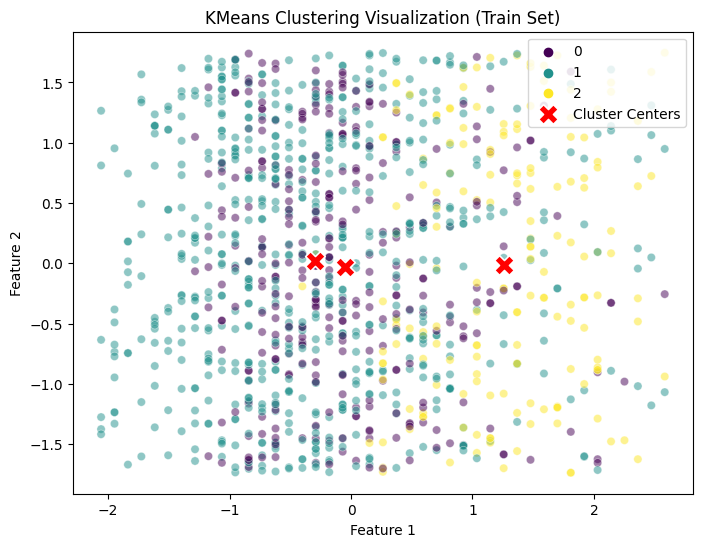

In [14]:
# Visualization for KMeans + Logistic Regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=kmeans.labels_, palette='viridis', alpha=0.5)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='red', marker='X', s=200, label='Cluster Centers')
plt.title("KMeans Clustering Visualization (Train Set)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

## **Analysis of KMeans + Logistic Regression Results**

### **1. KMeans Clustering**
- **Number of Clusters:** 3
- **Inertia:** 17,405.82 (lower values indicate better clustering)
- **Cluster Centers:** The centroids of each cluster show feature-wise differences, helping to segment employees into distinct groups.

### **2. Logistic Regression Coefficients**
Each coefficient represents the impact of a feature on the likelihood of attrition:

| **Feature** | **Coefficient** | **Interpretation** |
|------------|----------------|---------------------|
| **Age** | -0.89 | Older employees are less likely to leave. |
| **DistanceFromHome** | 0.61 | Employees living farther away are more likely to leave. |
| **JobLevel** | -0.51 | Higher job levels decrease attrition risk. |
| **MonthlyIncome** | -0.17 | Higher salaries reduce the likelihood of attrition. |
| **OverTime** | 1.55 | Employees working overtime are significantly more likely to leave. |
| **YearsInCurrentRole** | -1.16 | Longer tenure in a role reduces attrition risk. |
| **YearsSinceLastPromotion** | 0.74 | Employees who haven't been promoted recently are more likely to leave. |
| **Cluster_Label** | -0.90 | Cluster membership influences attrition prediction. |

### **3. Key Insights**
- **Financial Factors:** Higher **Monthly Income** and **Job Level** reduce attrition.
- **Work-life Balance:** Employees who work **Overtime** have a **much higher risk of leaving**.
- **Career Growth:** Employees who **haven't been promoted recently** are more likely to leave.
- **Geographic Factors:** Longer **commutes (DistanceFromHome)** increase attrition risk.
- **Job Satisfaction:** Features like **JobSatisfaction, EnvironmentSatisfaction, and WorkLifeBalance** have a moderate negative impact, indicating that dissatisfaction contributes to attrition.

### **4. Recommendations**
- **Improve Work-Life Balance**: Reduce excessive overtime to lower attrition.
- **Offer Career Growth**: Employees who stay longer in the same role or lack promotions are at risk.
- **Salary Adjustments**: Higher pay and benefits can help retain employees.
- **Remote Work Options**: Employees with long commutes may benefit from hybrid work models.

 **Final Conclusion**: The **KMeans + Logistic Regression model** provides useful insights into employee attrition, with clear business actions to reduce turnover.